C:\Users\Paul-Arthur\AppData\Local\Temp\ipykernel_28524\2530069190.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read("week2_unknown_guitar_string.wav")  # Replace with the correct path if needed


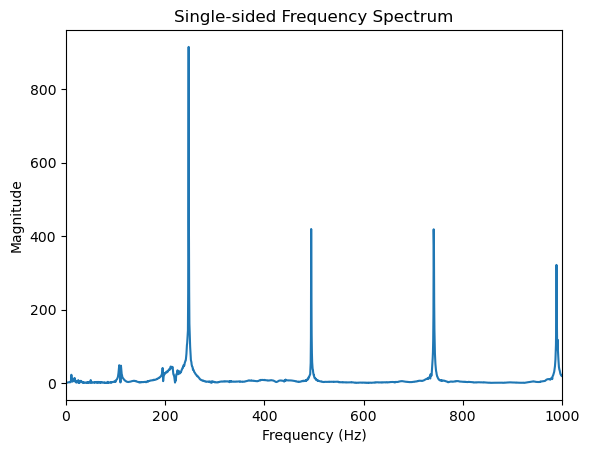

The open guitar string that was struck is B3.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read in audio file
fs, x = wavfile.read("week2_unknown_guitar_string.wav")  # Replace with the correct path if needed

# Compute the single-sided frequency spectrum
N = len(x)  # Length of audio data
X = np.fft.fft(x) / N  # Compute Fourier transform and normalize
f = np.fft.fftfreq(N, 1/fs)  # Frequency range
f_single = f[:N//2]  # Single-sided frequency range
X_single = 2 * np.abs(X[:N//2])  # Single-sided spectrum

# Plot the single-sided frequency spectrum
plt.figure()
plt.plot(f_single, X_single)
plt.xlim([0, 1000])  # Limit plot to 0–1kHz range
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Single-sided Frequency Spectrum')
plt.show()

# Find frequency of guitar string
max_index = np.argmax(X_single)
f_string = f_single[max_index]  # Estimated frequency of guitar string

# Determine which string was struck
string_names = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']  # String names
expected_freqs = [82.41, 110, 146.83, 196, 246.94, 329.63]  # Expected frequencies
string_index = np.argmin(np.abs(f_string - np.array(expected_freqs)))  # Compare estimated freq to expected freqs
string_name = string_names[string_index]  # Name of string that was struck

print(f'The open guitar string that was struck is {string_name}.')

### Z-transform: MATLAB/Python

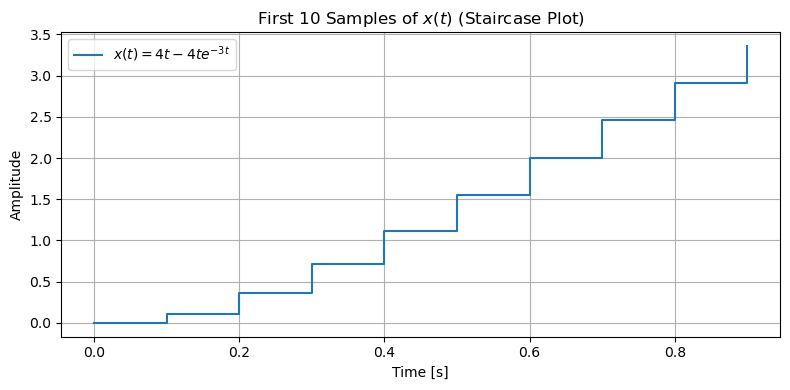

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def x(t):
    return 4 * t - 4 * t * np.exp(-3 * t)

# Sampling parameters
Ts = 0.1
n = np.arange(10)
t_samples = n * Ts
x_samples = x(t_samples)

# Staircase plot
plt.figure(figsize=(8, 4))
plt.step(t_samples, x_samples, where='post', label='$x(t) = 4t - 4t e^{-3t}$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('First 10 Samples of $x(t)$ (Staircase Plot)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
